In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import warnings as wrn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import ExtraTreesRegressor

In [4]:
%matplotlib inline
pd.set_option('display.max_columns', None)
wrn.filterwarnings("ignore")
plt.style.use('dark_background')
sns.set_style("darkgrid")

[*********************100%***********************]  1 of 1 completed


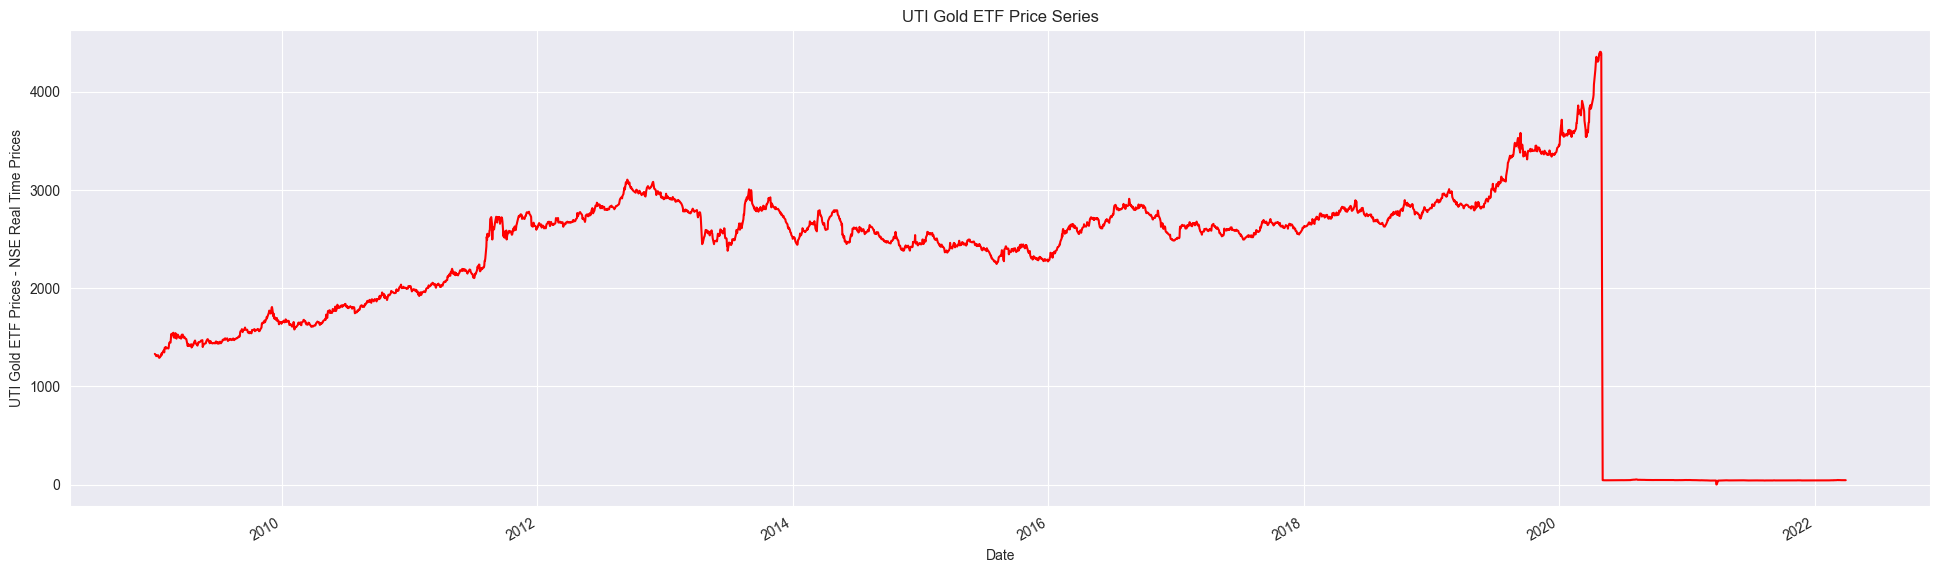

In [5]:
Df = yf.download('GOLDSHARE.NS', '2007-4-1', '2022-3-31', auto_adjust=True)
Df = Df[['Close']]
Df = Df.dropna()

Df.Close.plot(figsize=(24, 7),color='r')
plt.ylabel("UTI Gold ETF Prices - NSE Real Time Prices")
plt.title("UTI Gold ETF Price Series")
plt.show()

In [6]:
Df.shape
Df.head()

,Close
Date,
2009-01-02,1330.020020
2009-01-05,1317.000000
2009-01-06,1307.000000
2009-01-07,1317.099976
2009-01-09,1315.000000


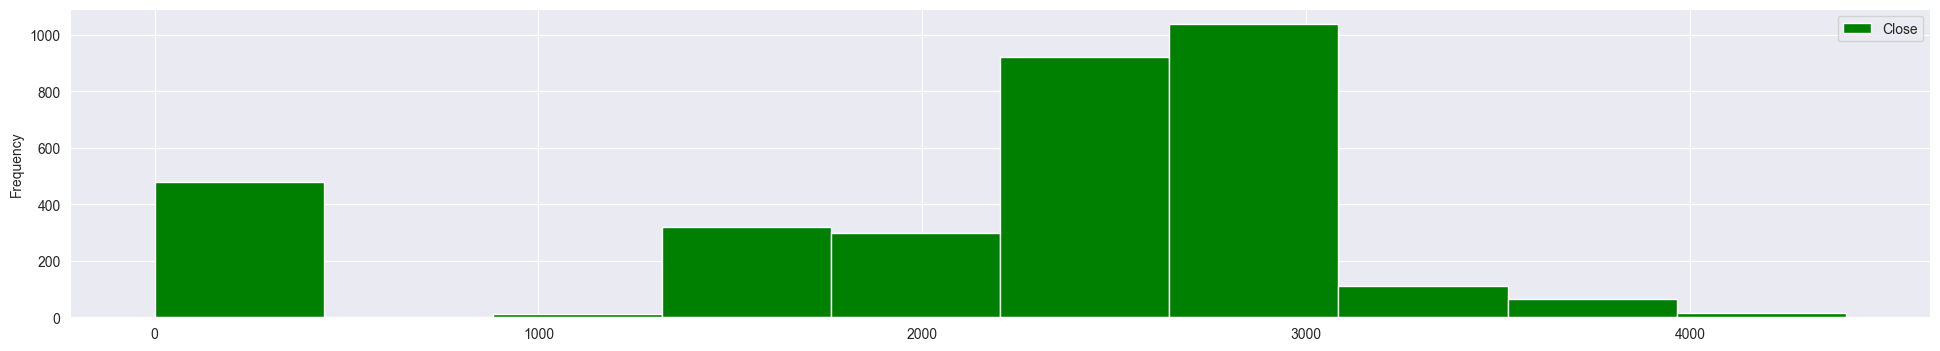

In [7]:
Df.plot(kind="hist", figsize=(24,4), layout=(1,5), color="g");

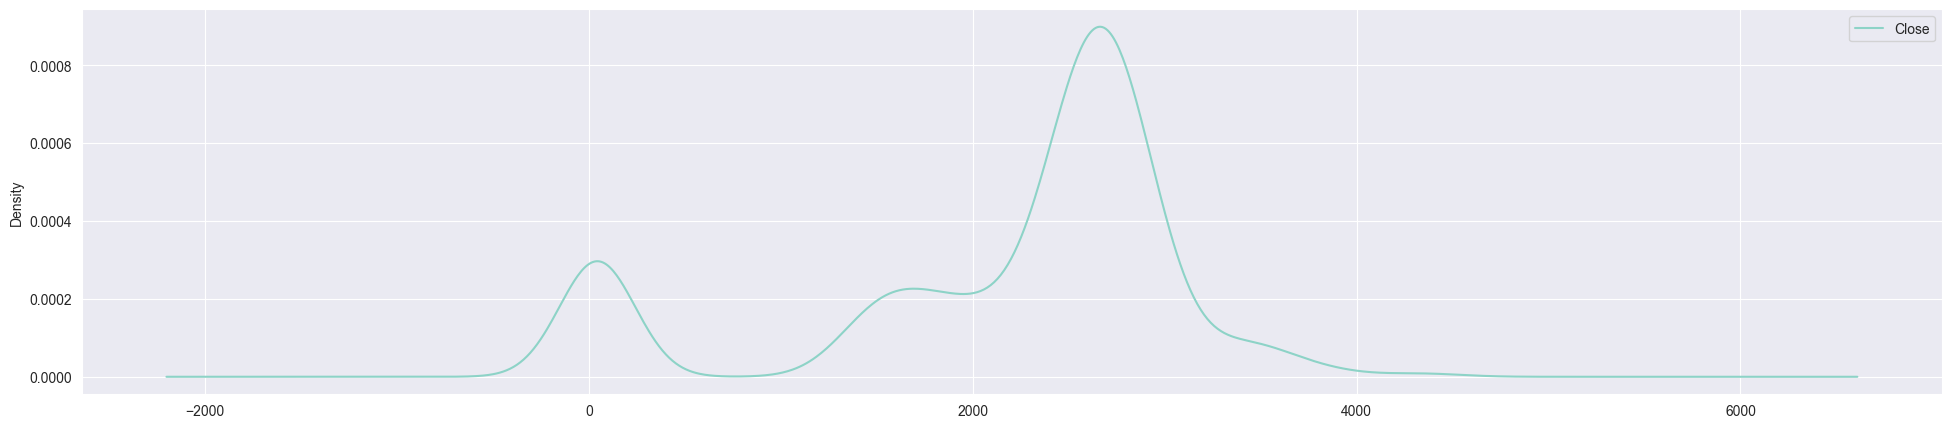

In [8]:
Df.plot(kind="kde", layout=(5,1), figsize=(24,5),sharex=False, sharey=False);

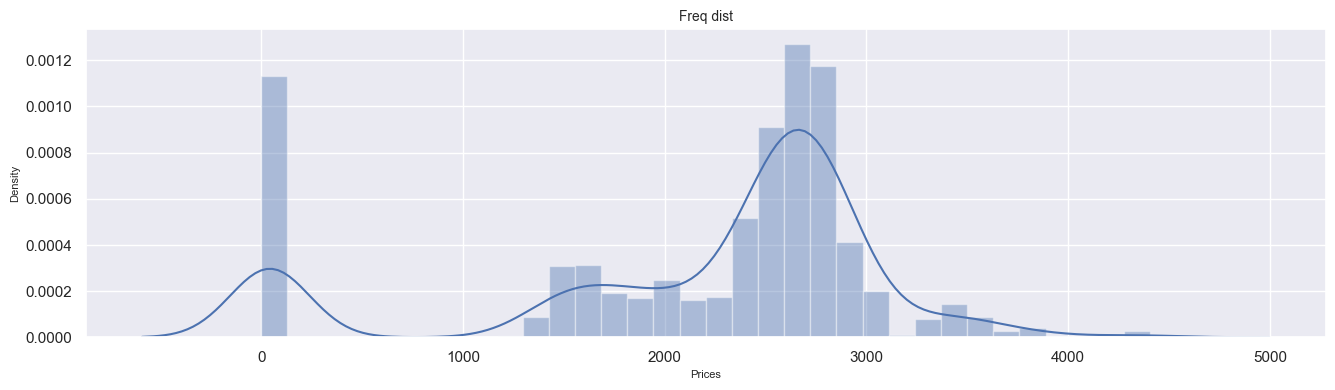

In [9]:
sns.set(rc={"figure.figsize": (16,4)})
ax = sns.distplot(Df)
ax.set_title('Freq dist', fontsize=10)
ax.set_xlabel('Prices', fontsize=8)
ax.set_ylabel('Density', fontsize=8)
plt.show()

In [10]:
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

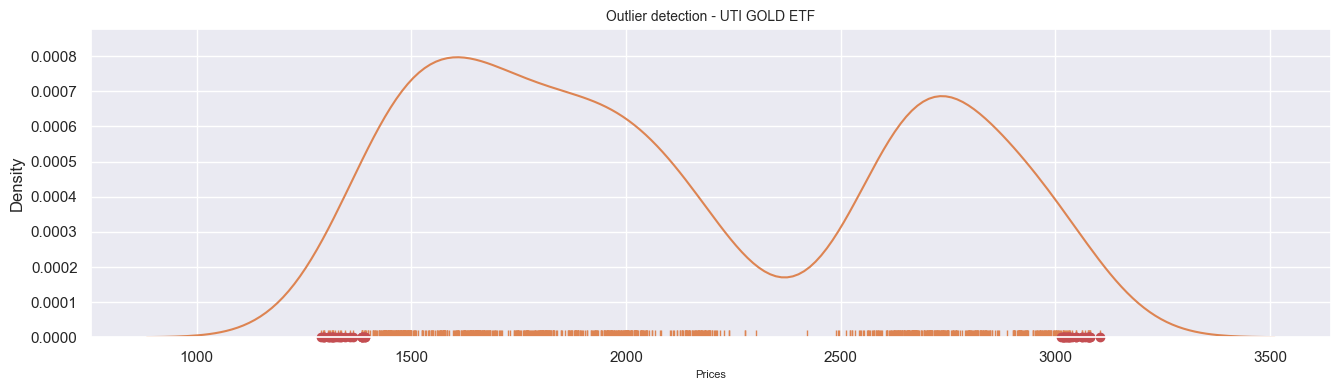

In [11]:
sns.set(rc={"figure.figsize": (16,4)})
x = Df['Close'][:1000]
ax = sns.distplot(Df, hist=False, kde=False)
sns.distplot(x, ax, rug=True, hist=False)
outliers = x[percentile_based_outlier(x)]
ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)
ax.set_title('Outlier detection - UTI GOLD ETF', fontsize=10)
ax.set_xlabel('Prices', fontsize=8)
plt.show()

In [12]:
data_preprocessed = Df.copy()
data_preprocessed.isnull().mean() * 100

Close    0.0
dtype: float64